## Data Science Lab Assignment 9
#### Name : Boganadham Venkata Sai Manoj
#### Section : A
#### Roll no : 197121
----------------------------------------------------------------------------------------
## **1. Implement the Principal Component Analysis**

First, import the required modules and dataset into the notebook

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# mounting the google drive folder 
drive.mount("/content/drive/")

# importing the dataset
dataset = pd.read_csv("/content/drive/MyDrive/DSc/Lab9/iris.csv", header=None)
dataset.head()

Mounted at /content/drive/


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Scale the dataset

We will normalize the dataset using Z-score Normalization

In [2]:
# Dividing the dataset into X and Y
X = dataset.iloc[:, :4]
Y = dataset.iloc[:, 3:4]

print("Shapes of the X and Y:")
print(X.shape, Y.shape)

# Z score normalization
# Performed normalization on each column
m = X.shape[1]
for i in range(m):
  X[i] = (X[i] - X[i].mean())/X[i].std()


Shapes of the X and Y:
(150, 4) (150, 1)


Converting the X into Numpy array

In [3]:
X = X.values
print(X[:5])

[[-0.89767388  1.02861128 -1.33679402 -1.30859282]
 [-1.13920048 -0.12454038 -1.33679402 -1.30859282]
 [-1.38072709  0.33672028 -1.39346985 -1.30859282]
 [-1.50149039  0.10608995 -1.28011819 -1.30859282]
 [-1.01843718  1.25924161 -1.33679402 -1.30859282]]


Calculate the covariance matrix of X

In [4]:
# Calculating the covariance matrix using numpy
X = X-X.mean()
covX = np.cov(X , rowvar = False)

print("Covariance matrix of the features")
print(covX)

Covariance matrix of the features
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


Calculating the Eigen values and vectors from the covariance matrix

In [5]:
# Calculate the Eigen values and vectors using numpy
eigen_values , eigen_vectors = np.linalg.eigh(covX)

print("Eigen values: ", eigen_values)
print("Eigen vectors: ", eigen_vectors)

Eigen values:  [0.02060771 0.14735328 0.92122093 2.91081808]
Eigen vectors:  [[ 0.26199559  0.72101681  0.37231836 -0.52237162]
 [-0.12413481 -0.24203288  0.92555649  0.26335492]
 [-0.80115427 -0.14089226  0.02109478 -0.58125401]
 [ 0.52354627 -0.6338014   0.06541577 -0.56561105]]


Sort the eigen vectors according to the eigen values

In [6]:
# Sorting the eigen vectors
# first we get the descending sorted state of eigen values indices
sortedIndex = np.argsort(eigen_values)[::-1]

# then we sort the eigen values and vectors according to indices
sortedValues = eigen_values[sortedIndex]
sortedVectors = eigen_vectors[:,sortedIndex]

print("Sorted Eigen values: ", sortedValues)
print("Sorted Eigen vectors: ", sortedVectors)

Sorted Eigen values:  [2.91081808 0.92122093 0.14735328 0.02060771]
Sorted Eigen vectors:  [[-0.52237162  0.37231836  0.72101681  0.26199559]
 [ 0.26335492  0.92555649 -0.24203288 -0.12413481]
 [-0.58125401  0.02109478 -0.14089226 -0.80115427]
 [-0.56561105  0.06541577 -0.6338014   0.52354627]]


Plotting the percentage of variance explained

[0.72770452 0.23030523 0.03683832 0.00515193]


<BarContainer object of 4 artists>

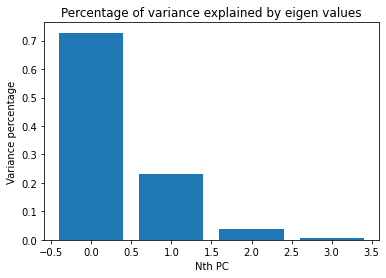

In [7]:
# Plot the percentage of variance explained
# To find the percentage of variance explained, divide each eigen value with the sum of all eigen values
percVariance = sortedValues/sortedValues.sum()
print(percVariance)

# Plot the variance percentage data
plt.title("Percentage of variance explained by eigen values")
plt.xlabel("Nth PC")
plt.ylabel("Variance percentage")
plt.bar(range(0,len(percVariance)), percVariance)

A function that returns first K eigen values

In [8]:
# Function for choosing the first k eigen vectors
def firstKEigen(sortedEigenValues, sortedEigenVectors, k):
  return sortedEigenValues[:k], sortedEigenVectors[:,:k]

print(firstKEigen(sortedValues, sortedVectors, 3))

(array([2.91081808, 0.92122093, 0.14735328]), array([[-0.52237162,  0.37231836,  0.72101681],
       [ 0.26335492,  0.92555649, -0.24203288],
       [-0.58125401,  0.02109478, -0.14089226],
       [-0.56561105,  0.06541577, -0.6338014 ]]))


A function that can transform dataset using Eigen vectors

In [9]:
# Transforming the original matrix
def PCA_transform(X, eigen_values, eigen_vectors, k):
  print("Old shape of X: ", X.shape)
  X = X - np.mean(X , axis = 0)
  # getting the first k eigen vectors
  pValues, pVectors = firstKEigen(eigen_values, eigen_vectors, k)

  #Transform the data 
  X_reduced = np.dot(pVectors.transpose(),X.transpose()).transpose()
  print("New shape of X: ", X_reduced.shape)
  return X_reduced


In [10]:
# Using the functions to transform the data
pca_x = PCA_transform(X, sortedValues, sortedVectors, 3)

print(pca_x[:10])

# Using the functions to transform the data
pca_x = PCA_transform(X, sortedValues, sortedVectors, 2)

print(pca_x[:10])

Old shape of X:  (150, 4)
New shape of X:  (150, 3)
[[ 2.25698063  0.5040154   0.12153619]
 [ 2.07945912 -0.65321639  0.22649206]
 [ 2.36004408 -0.31741394 -0.05130774]
 [ 2.29650366 -0.57344661 -0.09853036]
 [ 2.38080159  0.67251441 -0.0213563 ]
 [ 2.06362348  1.51347827 -0.03058181]
 [ 2.43754534  0.07431372 -0.34105507]
 [ 2.22638327  0.24678717  0.08229876]
 [ 2.3341381  -1.09148977 -0.15304967]
 [ 2.18136797 -0.44713112  0.24573628]]
Old shape of X:  (150, 4)
New shape of X:  (150, 2)
[[ 2.25698063  0.5040154 ]
 [ 2.07945912 -0.65321639]
 [ 2.36004408 -0.31741394]
 [ 2.29650366 -0.57344661]
 [ 2.38080159  0.67251441]
 [ 2.06362348  1.51347827]
 [ 2.43754534  0.07431372]
 [ 2.22638327  0.24678717]
 [ 2.3341381  -1.09148977]
 [ 2.18136797 -0.44713112]]


--------------------------------------------------------------------------

## **2. Implement PCA and Logistic Regression for the following dataset by performing the required steps.**

Dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

In [26]:
#importing the dataset
dataset_heart = pd.read_csv("/content/drive/MyDrive/DSc/Lab9/framingham.csv")

# dataset consists of some NaN values, so we drop the rows with NaN
dataset_heart = dataset_heart.dropna() 
dataset_heart.head()
dataset_heart = dataset_heart.sample(frac=1.0, random_state=25)

Scaling the data

In [27]:
# Getting the X_heart and Y_heart with X_heart normalized
train_data = dataset_heart.sample(frac=0.8, random_state=25)
test_data = dataset_heart.drop(train_data.index)
X_heart_train = train_data.iloc[:, :15]
Y_heart_train = train_data.iloc[:, 15:16]
X_heart_test = test_data.iloc[:, :15]
Y_heart_test = test_data.iloc[:, 15:16]

X_heart_train = (X_heart_train - X_heart_train.mean())/X_heart_train.std()
print(X_heart_train.head())

X_heart_train = X_heart_train.values

          male       age  education  currentSmoker  cigsPerDay    BPMeds  \
1704 -0.899860  0.976997  -0.962380      -0.984564   -0.767195 -0.172972   
1465 -0.899860 -0.305693  -0.962380       1.015331    0.932710 -0.172972   
3385  1.110904 -0.305693  -0.962380       1.015331    0.507734 -0.172972   
752   1.110904  1.443430   0.016397      -0.984564   -0.767195 -0.172972   
1425 -0.899860 -0.422301   0.016397       1.015331    0.932710 -0.172972   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
1704        -0.071784      1.505783  -0.16658 -0.306785  0.648446 -0.442404   
1465        -0.071784      1.505783  -0.16658  2.002989  1.263763  1.026132   
3385        -0.071784     -0.663879  -0.16658 -0.691748 -0.331504 -0.903944   
752         -0.071784     -0.663879  -0.16658 -0.510589 -1.015190 -1.701150   
1425        -0.071784     -0.663879  -0.16658  0.304625 -0.787295 -0.736112   

           BMI  heartRate   glucose  
1704 -1.072181  -0.055572  0.1

Function to select Principal Components

In [28]:
def PCA(X):
  # Subtract the mean of each of the features
  X = X - np.mean(X , axis = 0)
    
  # Calculate the covariance matrix of all features
  covX = np.cov(X , rowvar = False)
    
  # Calculate the eigen values and vectors
  eigenValues , eigenVectors = np.linalg.eigh(covX)
    
  # Sort the vectors according to their eigen values in descending order
  sortedIndex = np.argsort(eigenValues)[::-1]
  sortedValues = eigenValues[sortedIndex]
  sortedVectors = eigenVectors[:,sortedIndex]

  # Plot the percentage of variance explained
  # To find the percentage of variance explained, divide each eigen value with the sum of all eigen values
  percVariance = sortedValues/sortedValues.sum()
  print(percVariance)

  # Plot the variance percentage data
  plt.title("Percentage of variance explained by eigen values")
  plt.xlabel("Nth PC")
  plt.ylabel("Variance percentage")
  plt.bar(range(0,len(percVariance)), percVariance)
    
  return sortedValues, sortedVectors, percVariance

[0.21625689 0.12705465 0.10454174 0.07422201 0.0697821  0.06782362
 0.06666105 0.05950324 0.05396614 0.04607804 0.03903748 0.02587362
 0.02400045 0.0138809  0.01131806]
The first  11  eigen values are capturing more than 90% of the variance


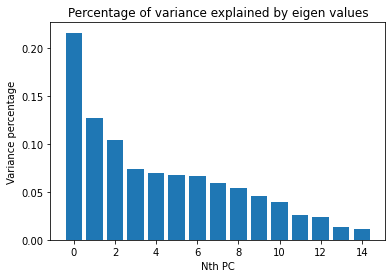

In [29]:
# Applying the PCA transformation on the datset
sortedValues, sortedVectors, percVariance = PCA(X_heart_train)

k = 0
sum = 0
for i in range(len(percVariance)):
  if(sum>=0.9):
    break
  sum += percVariance[i]
  k+=1

print("The first ",k," eigen values are capturing more than 90% of the variance")

From the graph, we can observe how much variance is captured by each eigen value

We can select first 11 eigen values because they are capturing more than 90% of the variance

In [30]:
# Transforming the X_heart using first 10 eigen values
# First get the first k eigen vectors
pValues, pVectors = firstKEigen(sortedValues, sortedVectors, k)

# Use the first k eigen vectors to transform X_heart
print("Shape of X_heart before applying PCA", X_heart_train.shape)
X_heart_reduced = np.dot(pVectors.transpose() , X_heart_train.transpose() ).transpose()
print("Shape of X_heart after applying PCA", X_heart_reduced.shape)

Shape of X_heart before applying PCA (2925, 15)
Shape of X_heart after applying PCA (2925, 11)


So using PCA, we have reduced 4 less significant features in decision making

Now we can fit a Logistic regression model to the transformed data

In [37]:
# import required modules from keras library to fit a neural network with zero hidden layers and only one neuron in output layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network using keras
number_of_classes = 2
number_of_features = X_heart_reduced.shape[1]
model = Sequential()
model.add(Dense(1,activation = 'sigmoid',input_dim = number_of_features))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics="accuracy")


In [38]:
# Fit the model to the data
model.fit(X_heart_reduced, Y_heart_train, epochs=50)


Epoch 1/50
92/92 [==============================] - 0s 1ms/step - loss: 0.8401 - accuracy: 0.5091
Epoch 2/50
92/92 [==============================] - 0s 1ms/step - loss: 0.7669 - accuracy: 0.5484
Epoch 3/50
92/92 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.5904
Epoch 4/50
92/92 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6356
Epoch 5/50
92/92 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6855
Epoch 6/50
92/92 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.7309
Epoch 7/50
92/92 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7682
Epoch 8/50
92/92 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7969
Epoch 9/50
92/92 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.8147
Epoch 10/50
92/92 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.8287
Epoch 11/50
92/92 [

The model was converging at less than 50 epochs, so I have trained the model for 50 epochs only

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


Making predictions and printing accuracy

In [39]:
X_test_reduced = np.dot(pVectors.transpose() , X_heart_test.transpose() ).transpose()
preds = model.predict(X_test_reduced)